In [1]:
#Practice project 5 : Titanic Project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


df=pd.read_csv(r'C:\ProgramData\titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape


# there are 891 rows and 12 columns in given dataset

(891, 12)

In [3]:
# Exploratory Data Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# There are missing values at Age, Cabin, and Embarked columns of dataset.
# 2 of the features are floats, 5 are integers and 5 are objects

# short description of features :

#survival:    Survival 
#PassengerId: Unique Id of a passenger. 
#pclass:    Ticket class     
#sex:    Sex     
#Age:    Age in years     
#sibsp:    # of siblings / spouses aboard the Titanic     
#parch:    # of parents / children aboard the Titanic     
#ticket:    Ticket number     
#fare:    Passenger fare     
#cabin:    Cabin number     
#embarked:   embarked port

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Above we can see that 38% out of the training-set survived the Titanic.
# We can also see that the passenger ages range from 0.4 to 80

In [7]:
# checking null values in dataset

df.isnull().sum()

# below data shows ,there are no null values in dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Clearly we see that age and cabin variable has maximum null values along with 2 null values for embarked variable
# And cabin variable has 70% data as null values , so its better to drop it.

In [9]:
#filling age variable null values with mean of age variable

df['Age'].fillna(df['Age'].mean(),inplace=True)

In [10]:
# checking if age variable has null value or not 

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
# We have 'S' with maximum values in 'Embarked' variable ,so we will fill null values in 'Embarked' with 'S'

fill='S'
df['Embarked'].fillna(fill,inplace=True)

In [13]:
# checking for embarked variables null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
# Exploratory Data Analsysis

# The 'Sex' variable data is categorical so we will use LabelEncoder to convert it to ordinal.

le=LabelEncoder()

df['Sex']=le.fit_transform(df['Sex'])

In [15]:
# # The 'Embarked' variable data is categorical so we will use LabelEncoder to convert it to ordinal.

df['Embarked']=le.fit_transform(df['Embarked'])

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [17]:
# Analyszing features by using plots : 

df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,0,0.742038
1,1,0.188908


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

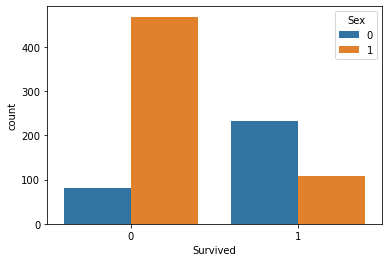

In [18]:
sns.countplot(df["Survived"], hue=df["Sex"])

In [19]:
# looking at the gender vs surviving rates, the results look interesting. 
# The surviving ratio in females is much more than males’.
# According to this data, there is a strong correlation between survived and sex columns.

In [20]:
# point of embarked

df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,0,0.553571
1,1,0.389610
2,2,0.339009


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

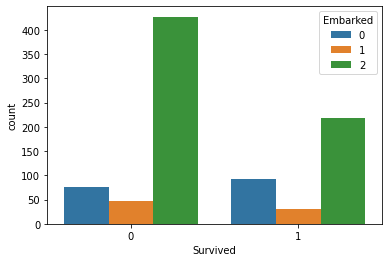

In [21]:
sns.countplot(df["Survived"], hue=df["Embarked"])

In [22]:
# Above plot clearly shows that the surviving ratio of passengers who were embarked from 'C' have a higher surviving ratio.

In [23]:
# passenger class


df[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

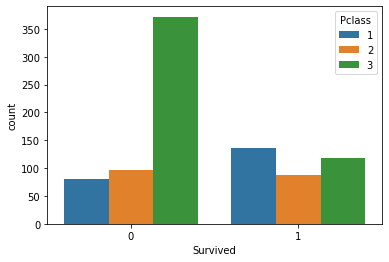

In [24]:
sns.countplot(df["Survived"], hue=df["Pclass"])

In [25]:
# The majority of passengers from the upper class have survived. A large number of 3rd class did not survive.

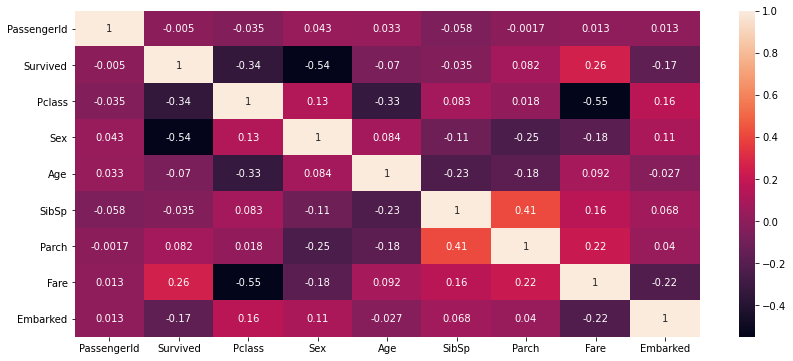

In [26]:
# checking correlation of independent variables with 'Survived' variable

plt.figure(figsize=(14,6))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [27]:
corr_matrix['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

In [28]:
# Above  heat map clealry states that there is a very strong correlation between surviving and sex,plcass and fare 

In [29]:
#  we can drop passenger id ,name from the dataset as it has no role to play,ticket, and cabin as it has 70 % null values

In [30]:
#  Dropping passenger id , ticket, and cabin from dataset

df.drop(['PassengerId','Ticket','Cabin'],axis=1,inplace=True)

In [31]:
df.drop(['Name'],axis=1,inplace=True)

In [32]:
# checking skewness in dataset

df.skew().sort_values()

Embarked   -1.264823
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
Survived    0.478523
Parch       2.749117
SibSp       3.695352
Fare        4.787317
dtype: float64

In [33]:
#removing skewness keeping threshold +/-1.5


from sklearn.preprocessing import power_transform
x_new=power_transform(df)

df_new=pd.DataFrame(x_new,columns=df.columns)

df_new.skew().sort_values(ascending=False)

Parch       1.228795
SibSp       0.808608
Survived    0.478523
Age         0.064420
Fare       -0.040329
Pclass     -0.441438
Sex        -0.618921
Embarked   -1.064527
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

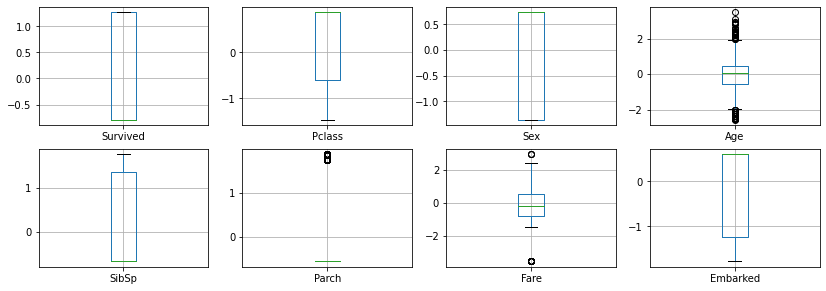

In [34]:
# checking outliers in features

df_new.plot(kind='box', subplots=True, layout=(4,4), figsize=(14,10), grid=True)
plt.show

In [35]:
# Clearly from above only Age,Parch,Fare have outliers

In [36]:
# Detecting outlier and removing it

import numpy as np

from scipy import stats
df_outlier= df_new.copy()
z = np.abs(stats.zscore(df_outlier))
print(z)

[[0.78927234 0.86397329 0.73769513 ... 0.56025296 0.87882001 0.61041095]
 [1.2669898  1.45912855 1.35557354 ... 0.56025296 1.33665056 1.78052001]
 [1.2669898  0.86397329 1.35557354 ... 0.56025296 0.79006485 0.61041095]
 ...
 [0.78927234 0.86397329 1.35557354 ... 1.84685634 0.28888536 0.61041095]
 [1.2669898  1.45912855 0.73769513 ... 0.56025296 0.52790578 1.78052001]
 [0.78927234 0.86397329 0.73769513 ... 0.56025296 0.81234947 1.23633916]]


In [37]:
# Defining threshold to identify an outlier

threshold = 2
print(np.where(z > 2))

(array([  7,  10,  11,  16,  27,  33,  43,  54,  58,  63,  78,  88,  94,
        96, 116, 118, 119, 164, 170, 171, 172, 179, 183, 184, 193, 195,
       205, 232, 233, 252, 258, 261, 263, 268, 268, 271, 275, 277, 280,
       297, 299, 302, 305, 311, 318, 326, 332, 340, 341, 348, 366, 374,
       377, 380, 381, 386, 407, 413, 438, 438, 445, 448, 456, 466, 469,
       479, 481, 483, 487, 493, 527, 530, 545, 555, 557, 570, 587, 597,
       609, 618, 625, 630, 633, 642, 644, 659, 672, 674, 679, 684, 689,
       691, 694, 700, 716, 730, 732, 737, 742, 745, 750, 755, 777, 779,
       788, 803, 806, 815, 822, 824, 827, 829, 831, 850, 851, 856, 869],
      dtype=int64), array([3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 6, 3, 3, 3, 3, 3, 6,
       3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 6, 3, 6, 6, 3, 6, 3, 3, 6, 6, 3, 6,
       6, 3, 6, 3, 6, 3, 3, 3, 6, 6, 3, 3, 3, 6, 3, 6, 3, 3, 3, 6, 3, 3,
       6, 3, 3, 3, 6, 3, 3, 3, 6, 3, 3, 6, 6, 3, 3, 3, 6, 3, 3, 3, 3, 6,
       6, 3, 6, 3, 3, 6, 6, 6, 6, 6, 6

In [38]:
df_outlier=df_outlier[(z < 2).all(axis=1)]
df.shape

(891, 8)

In [39]:
df_new.shape

(891, 8)

In [40]:
df_outlier.shape

(776, 8)

In [41]:
# Columns have reduced after removing outliers

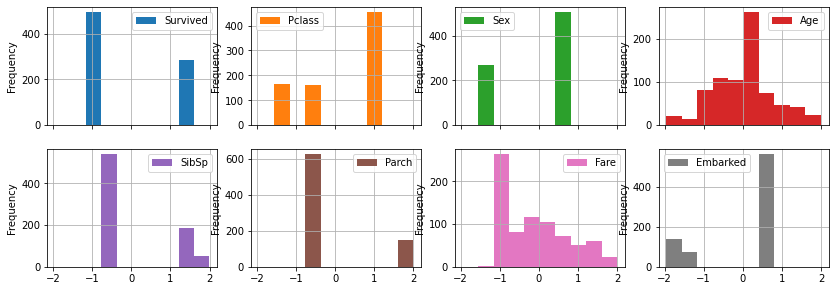

In [42]:
# checking  distribution of the independent features through histogram

df_outlier.plot(kind='hist', subplots=True, layout=(4,4), figsize=(14,10), grid=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

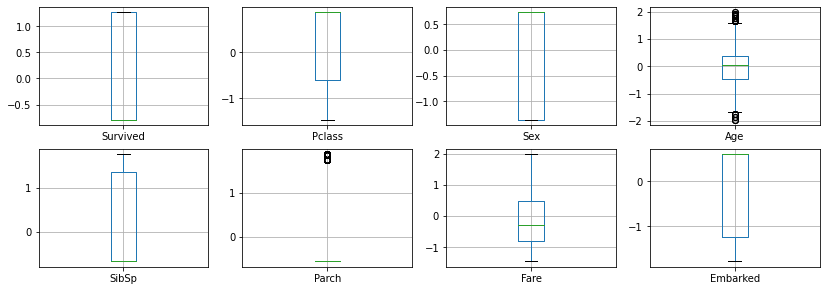

In [43]:
# checking outliers in features

df_outlier.plot(kind='box', subplots=True, layout=(4,4), figsize=(14,10), grid=True)
plt.show

In [44]:
# Separating feature variables and target variable

X = df_outlier.drop(['Survived'], axis = 1)
y = df_outlier['Survived']

In [50]:
# Evaluation of models

#Training model with DecisionTreeClassifier and finding the best state,accuracy_score

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

model_dt = DecisionTreeClassifier()

score_s=0
state=0
for i in range(0,20):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_dt.fit(X_train, y_train.astype(int))
    y_pred_dt = model_dt.predict(X_test)
    acc=accuracy_score(y_test.astype(int),y_pred_dt)
    if acc>score_s:
        score_s=acc
        state=i
        
print('best random_state : ',state)
print('best accuracy score : ',score_s)

best random_state :  18
best accuracy score :  0.8111587982832618


In [51]:
# Finding best accuracy score with best random state

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =18)
model_dt.fit(X_train,y_train.astype(int))
y_pred_dt = model_dt.predict(X_test)
acc=accuracy_score(y_test.astype(int),y_pred_dt)
acc

0.8154506437768241

In [57]:
# getting classification_report of DecisionTreeClassifier  model


from sklearn.metrics import classification_report
print(classification_report(y_test.astype(int), y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       149
           1       0.77      0.69      0.73        84

    accuracy                           0.82       233
   macro avg       0.80      0.79      0.79       233
weighted avg       0.81      0.82      0.81       233



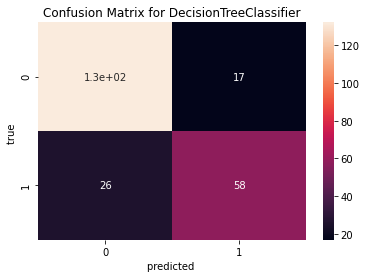

In [58]:
# confusion matrix of DecisionTreeClassifier  model

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.astype(int),y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted ")
plt.ylabel("true ")
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

In [67]:
# finding cross validation score

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(DecisionTreeClassifier(random_state=18), X_test,y_test.astype(int), scoring='accuracy', cv = 5).mean()
print(accuracy)

0.803145235892692


In [56]:
#Training model with RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model_rfl = RandomForestClassifier(random_state=12)
model_rfl.fit(X_train, y_train.astype(int))
y_pred_rfl = model_rfl.predict(X_test)


accuracy_score(y_test.astype(int),y_pred_rfl)

0.7982832618025751

In [68]:
# getting classification_report of RandomForestClassifier model


from sklearn.metrics import classification_report
print(classification_report(y_test.astype(int), y_pred_rfl))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       149
           1       0.77      0.63      0.69        84

    accuracy                           0.80       233
   macro avg       0.79      0.76      0.77       233
weighted avg       0.80      0.80      0.79       233



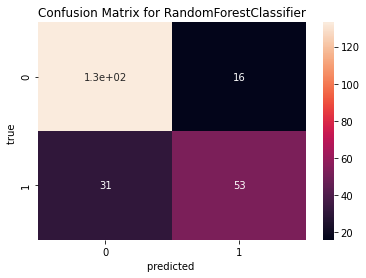

In [69]:
# confusion matrix of RandomForestClassifier model

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.astype(int),y_pred_rfl)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted ")
plt.ylabel("true ")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [72]:
# finding cross validation score

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(RandomForestClassifier(random_state=10), X_test,y_test.astype(int), scoring='accuracy', cv = 5).mean()
print(accuracy)

0.820259019426457


In [76]:
#Training model with LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_lr = LogisticRegression(random_state=10)
model_lr.fit(X_train, y_train.astype(int))
y_pred_lr = model_lr.predict(X_test)


accuracy_score(y_test.astype(int),y_pred_lr)


0.8068669527896996

In [77]:
# getting classification_report of LogisticRegression model


from sklearn.metrics import classification_report
print(classification_report(y_test.astype(int), y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       149
           1       0.76      0.68      0.72        84

    accuracy                           0.81       233
   macro avg       0.79      0.78      0.79       233
weighted avg       0.80      0.81      0.80       233



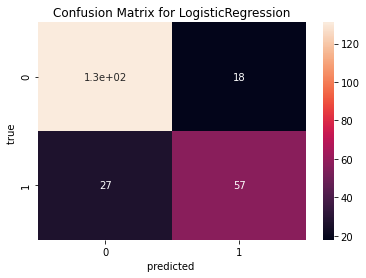

In [78]:
# confusion matrix of LogisticRegression model

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.astype(int),y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted ")
plt.ylabel("true ")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

In [85]:
# finding cross validation score

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(LogisticRegression(random_state=10), X_test,y_test.astype(int), scoring='accuracy', cv = 5).mean()
print(accuracy)

0.8114708603145235


In [ ]:
# RandomForestClassifier model is giving a good accuracy score and cross validation score.

In [86]:
# HyperParameterTuning

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['ginni','entropy']}

GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(X_train,y_train.astype(int))
GCV.best_params_  # Printing the best parameter found by GridSearchCV


GCV_pred=GCV.best_estimator_.predict(X_test)   # predicting the best parameters
accuracy_score(y_test.astype(int),GCV_pred)    # checking final accuracy

0.8283261802575107

In [ ]:
# Final accuracy_score clearly states that RandomForestClassifier model is very good enough to predict survived or not

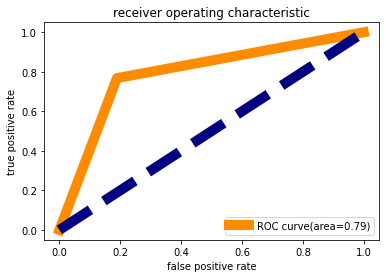

In [87]:
# AUC_ROC curve

from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred_rfl,y_test.astype(int))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Above roc_curve area clearly states the goodness of RandomForestClassifier model for predicting 'survived' or not

In [88]:
# Exporting the model through pickle

import pickle
filename='titanic.pkl'
pickle.dump(model_rfl,open(filename,'wb'))

In [89]:
# Conclusion:

import numpy as np
a=np.array(y_test.astype(int))
predicted=np.array(model_rfl.predict(X_test))
df_com=pd.DataFrame({'original':a,'predcited':predicted},index=range(len(a)))
df_com

,original,predcited
0,0,0
1,0,0
2,1,0
3,0,0
4,0,1
...,...,...
228,1,1
229,0,0
230,0,0
231,0,1
